
<h2> import </h2>


In [8]:
import geemap
import os
import ee
import matplotlib.pyplot as plt
from geemap import cartoee
import cartopy.crs as ccrs
from sqlalchemy import false, true

geemap.ee_initialize()

<h3>設定年份經緯度</h3>

In [9]:
#經緯度要到小數點後面一點 
#經緯度的數字要調好 不然圖片會有破損

lat = -16.2853 
lon = -62.4593 
start_year = 1984
end_year = 2012

point = ee.Geometry.Point(lon, lat)
years = ee.List.sequence(start_year, end_year)




<h3> 選取圖片 </h3>


In [10]:
def get_best_image(year):
    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = ee.Date.fromYMD(year, 12, 31)
    image = (
        ee.ImageCollection("LANDSAT/LT05/C02/T1_TOA")
        .filterBounds(point)#設定範圍
        .filter(ee.Filter.calendarRange(1, 12, 'month'))#指定月份 1-12月
        .filterDate(start_date, end_date)
        .sort('CLOUD_COVER').first()#去雲
        )
    return ee.Image(image)

#圖像可視化
#https://developers.google.com/earth-engine/guides/image_visualization
vis_params = {"bands": ['B3', 'B2', 'B1'],#rbg
              "min": 0.0,
              "max": 0.4,
              "gamma" : 1.0, #亮度             
            }

collection = ee.ImageCollection(years.map(get_best_image))
image = ee.Image(collection.first())

<h3>從地圖上看選取範圍<h3>


In [11]:
#因為跑要時間所以註掉
# Map = geemap.Map()
# Map.addLayer(image, vis_params, 'First image')
# Map.setCenter(lon, lat, 8)
# Map


<h3> 顯示圖片 </h3>


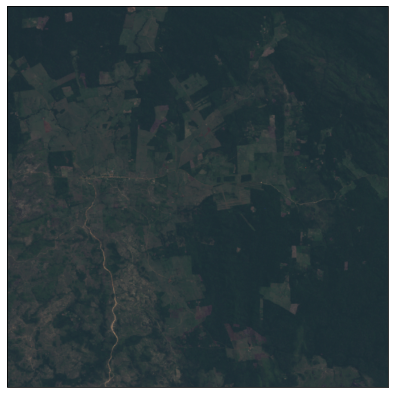

In [12]:
#設定範圍
w = 0.1
h = 0.1
region = [lon - w, lat - h, lon + w, lat + h]

fig = plt.figure(figsize=(10, 7))
ax = cartoee.get_map(image, region=region, vis_params=vis_params)
plt.show()

<h3>下載圖片</h3>

In [13]:
#collection.aggregate_array('system:index').getInfo()

In [14]:
#設定範圍
w = 0.3
h = 0.3
region = [lon - w, lat - h, lon + w, lat + h]

#設定路徑及資料夾名稱
downloads_name = 'pic4'
downloads_path = "~/Downloads/" + downloads_name

#下載圖片 要用再解註
# cartoee.get_image_collection_gif(
#     ee_ic=collection,
#     out_dir=os.path.expanduser(downloads_path),
#     out_gif="1984-2012_timelapse.gif",
#     vis_params=vis_params,
#     region=region,#選取範圍
#     fps=1,
#     #mp4=True,
#     #grid_interval=(0.2, 0.2),
#     plot_title=" ",
#     date_format='YYYY-MM-dd',
#     fig_size=(10, 8),
#     dpi_plot=100,
#     file_format="png",
#     #north_arrow_dict=north_arrow_dict,
#     #scale_bar_dict=scale_bar_dict,
#     verbose=True,
#     )


KeyboardInterrupt: 